In [1]:
from sklearn import metrics, datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import numpy as np
%matplotlib inline

# 回歸問題
常見的評估指標有

MAE

MSE

R-square

我們隨機生成(X, y)資料，然後使用線性回歸模型做預測，再使用 MAE, MSE, R-square 評估

In [2]:
X, y = datasets.make_regression(n_features=1, random_state=42, noise=4) # 生成資料
model = LinearRegression() # 建立回歸模型
model.fit(X, y) # 將資料放進模型訓練
prediction = model.predict(X) # 進行預測
mae = metrics.mean_absolute_error(prediction, y) # 使用 MAE 評估
mse = metrics.mean_squared_error(prediction, y) # 使用 MSE 評估
r2 = metrics.r2_score(prediction, y) # 使用 r-square 評估
print("MAE: ", mae)
print("MSE: ", mse)
print("R-square: ", r2)

MAE:  2.841797252565566
MSE:  12.48868006739824
R-square:  0.9916581036260311


# 分類問題
常見的評估指標有

AUC

F1-Score (Precision, Recall)

In [3]:
cancer = datasets.load_breast_cancer() # 我們使用 sklearn 內含的乳癌資料集
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=50, random_state=0)

In [4]:
print(y_test)

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0]


In [5]:
y_pred = np.random.random((50,))

In [6]:
print(y_pred)

[0.76771484 0.78281895 0.46343579 0.55432674 0.27733166 0.6608232
 0.16778149 0.62284286 0.98069565 0.51409119 0.50919275 0.12701834
 0.0983983  0.80766066 0.44952426 0.57297566 0.0373994  0.2216883
 0.81065567 0.12954336 0.86416542 0.73631559 0.32220488 0.65147646
 0.43740724 0.41756755 0.62267715 0.41085587 0.47046858 0.30382441
 0.46723105 0.43827774 0.70654379 0.88258389 0.84729166 0.14836671
 0.95990849 0.03165513 0.20779779 0.99294682 0.07173832 0.55798941
 0.78400497 0.01598621 0.28622943 0.96102404 0.32277175 0.52100556
 0.90520531 0.88701279]


# AUC

In [7]:
auc = metrics.roc_auc_score(y_test, y_pred) # 使用 roc_auc_score 來評估。 **這邊特別注意 y_pred 必須要放機率值進去!**
print("AUC: ", auc) # 得到結果約 0.5，與亂猜的結果相近，因為我們的預測值是用隨機生成的

AUC:  0.44821731748726656


# F1-Score

In [8]:
threshold = 0.5 
y_pred_binarized = np.where(y_pred>threshold, 1, 0) # 使用 np.where 函數, 將 y_pred > 0.5 的值變為 1，小於 0.5 的為 0
f1 = metrics.f1_score(y_test, y_pred_binarized) # 使用 F1-Score 評估
precision = metrics.precision_score(y_test, y_pred_binarized) # 使用 Precision 評估
recall  = metrics.recall_score(y_test, y_pred_binarized) # 使用 recall 評估
print("F1-Score: ", f1) 
print("Precision: ", precision)
print("Recall: ", recall)

F1-Score:  0.5614035087719298
Precision:  0.6153846153846154
Recall:  0.5161290322580645


## 練習時間
### F1-Score 其實是 F-Score 中的 β 值為 1 的特例，代表 Precision 與 Recall 的權重相同

請參考 F1-score 的[公式](https://en.wikipedia.org/wiki/F1_score) 與下圖的 F2-score 公式圖，試著寫出 F2-Score 的計算函數

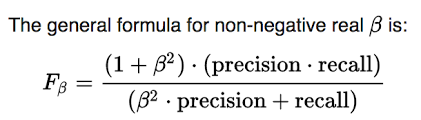

HINT: 可使用 slearn.metrics 中的 precision, recall 函數幫忙

In [9]:
import numpy as np
y_pred = np.random.randint(2, size=100)  # 生成 100 個隨機的 0 / 1 prediction
y_true = np.random.randint(2, size=100)  # 生成 100 個隨機的 0 / 1 ground truth

In [10]:
print('prediction value : ',y_pred)
print("")
print('ground truth : ',y_true)

prediction value :  [1 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1
 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0]

ground truth :  [0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1
 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1
 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1]


In [11]:
from sklearn import metrics
precision = metrics.precision_score(y_true, y_pred)
recall = metrics.recall_score(y_true, y_pred)
def Fb2Score(beta, precision, recall):
    return ((1+beta**2)*(precision*recall))/(beta**2*precision+recall)

In [12]:
Fb2Score(2, precision, recall)

0.5303030303030303